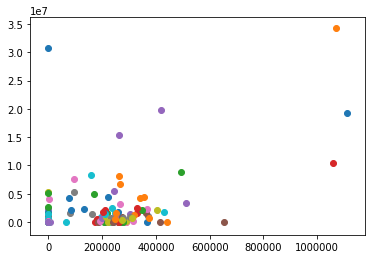

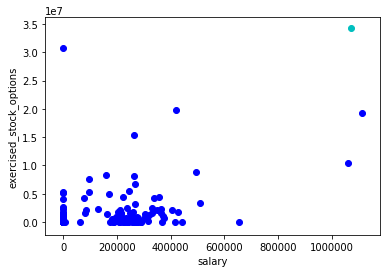

In [41]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""



from sklearn.cluster import KMeans
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
import pandas as pd


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("enron/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### print the scatter plot for the features
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.labels_

try:
    Draw(pred, finance_features, poi, mark_poi=False, name="3clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"
    

In [42]:
## Prep: Import the dict to df, reformat column types from text to numeric
email_df = pd.DataFrame.from_dict(data_dict, orient='index')
email_df[['salary', 'exercised_stock_options']] = email_df[['salary','exercised_stock_options']].apply(pd.to_numeric, errors='coerce')
print email_df.head()

                      salary to_messages deferral_payments total_payments  \
ALLEN PHILLIP K     201955.0        2902           2869717        4484442   
BADUM JAMES P            NaN         NaN            178980         182466   
BANNANTINE JAMES M     477.0         566               NaN         916197   
BAXTER JOHN C       267102.0         NaN           1295738        5634343   
BAY FRANKLIN R      239671.0         NaN            260455         827696   

                    exercised_stock_options    bonus restricted_stock  \
ALLEN PHILLIP K                   1729541.0  4175000           126027   
BADUM JAMES P                      257817.0      NaN              NaN   
BANNANTINE JAMES M                4046157.0      NaN          1757552   
BAXTER JOHN C                     6680544.0  1200000          3942714   
BAY FRANKLIN R                          NaN   400000           145796   

                   shared_receipt_with_poi restricted_stock_deferred  \
ALLEN PHILLIP K           

In [43]:
## Stock Options: Let's take a look at the minimum and maximum values
stock_min = email_df['exercised_stock_options'].min()
stock_max = email_df['exercised_stock_options'].max()
print "The minimum stock option value is {0:.0f}, and the maximum stock option value is {1:.0f}".format(stock_min, stock_max)

## Salaries: Let's also take a look a the minimum and maximum values for salary
salary_min = email_df['salary'].min()
salary_max = email_df['salary'].max()
print "The minimum salary taken by an employee is {0:.0f}, and the maximum salary taken by an employee is {1:.0f}".format(salary_min, salary_max)


The minimum stock option value is 3285, and the maximum stock option value is 34348384
The minimum salary taken by an employee is 477, and the maximum salary taken by an employee is 1111258
